# Quantitative Seismic Interpretation (Avseth, et al, 2005)

## Chapter 4, Common techniques for quantitative seismic interpretation. 

### 4.3.16 Probabilistic AVO analysis


**Extract taken from page 225-226, Quantifying AVO uncertainties related to variability in rock properties**

*"In this section we show how we can do probabilistic AVO analysis taking into account the natural variability and uncertainties in rock properties.  As explained in Chapter 3, from well-log analysis combined with rock physics modeling, we first extract cumulative density functions (cdfs) of seismic properties for different lithofacies and fluid scenarios.  Based on the cdfs of velocities and density, we create probability density functions (pdfs) of AVO response for different lithofacies combinations, and assess uncertainties in seismic signatures related to the natural variability within each facies."*

The well-log analysis referenced here is provided by Avseth and in the key well (Well2) there are six different lithofacies (shale, silty shale, clean sand, silty sand 1, silty sand 2, and cemented sand) and two fluid scenarios (brine, oil).  Creating probability density functions in this method is to calculate the kernel density for each lithofacies/scenario distribution (e.g. clean sand - brine, cemented sand - oil, etc).  Uncertainty is defined by resampling from each distribution according to the associated probability of that distribution.

### Import libraries

In [1]:
from packages.functions import * #vshale_from_gr, vrh

['./data/well_2.las']


### Load well data

In [2]:
df = load()[0]

### Add feature columns

Add VP, VS, VSH (IGR, Iarionov, Steiber, ), IP, IS, VP/VS, sand-shale indicator, facies code, reservoir code, 

In [3]:
well2 = well_add_features(df)

### Well header

In [4]:
well2.head()

,DEPTH,VP,VS,RHOB,GR,NPHI,IGR,VSH_clavier,VSH_larionovO,VSH_steiber,...,PHIE,IP,IS,VPVS,sandy-shaly,K0,FACIES,RESERVOIR,LABELS,FCODES
0,2013.2528,2.2947,0.8769,1.9972,91.8785,0.4908,0.493621,0.301691,0.324189,0.245246,...,0.408000,4582.97484,1751.34468,2.616832,sandy,22.676699,0,0,0,6
1,2013.4052,2.2967,0.9430,2.0455,86.8004,0.4833,0.436010,0.254496,0.273974,0.204894,...,0.377812,4697.89985,1928.90650,2.435525,sandy,24.820085,0,0,0,6
2,2013.5576,2.2904,0.9125,2.1122,86.0021,0.4474,0.426953,0.247424,0.266438,0.198944,...,0.336125,4837.78288,1927.38250,2.510027,sandy,25.646882,0,0,0,6
3,2013.7100,2.2775,0.8916,2.1960,87.3570,0.4140,0.442325,0.259481,0.279284,0.209102,...,0.283750,5001.39000,1957.95360,2.554397,sandy,25.894306,0,0,0,6
4,2013.8624,2.2620,0.8905,2.2020,90.4024,0.4293,0.476875,0.287567,0.309177,0.233048,...,0.280000,4980.92400,1960.88100,2.540146,sandy,25.048897,0,0,0,6


### Well plot

Reference: Agile Geoscience

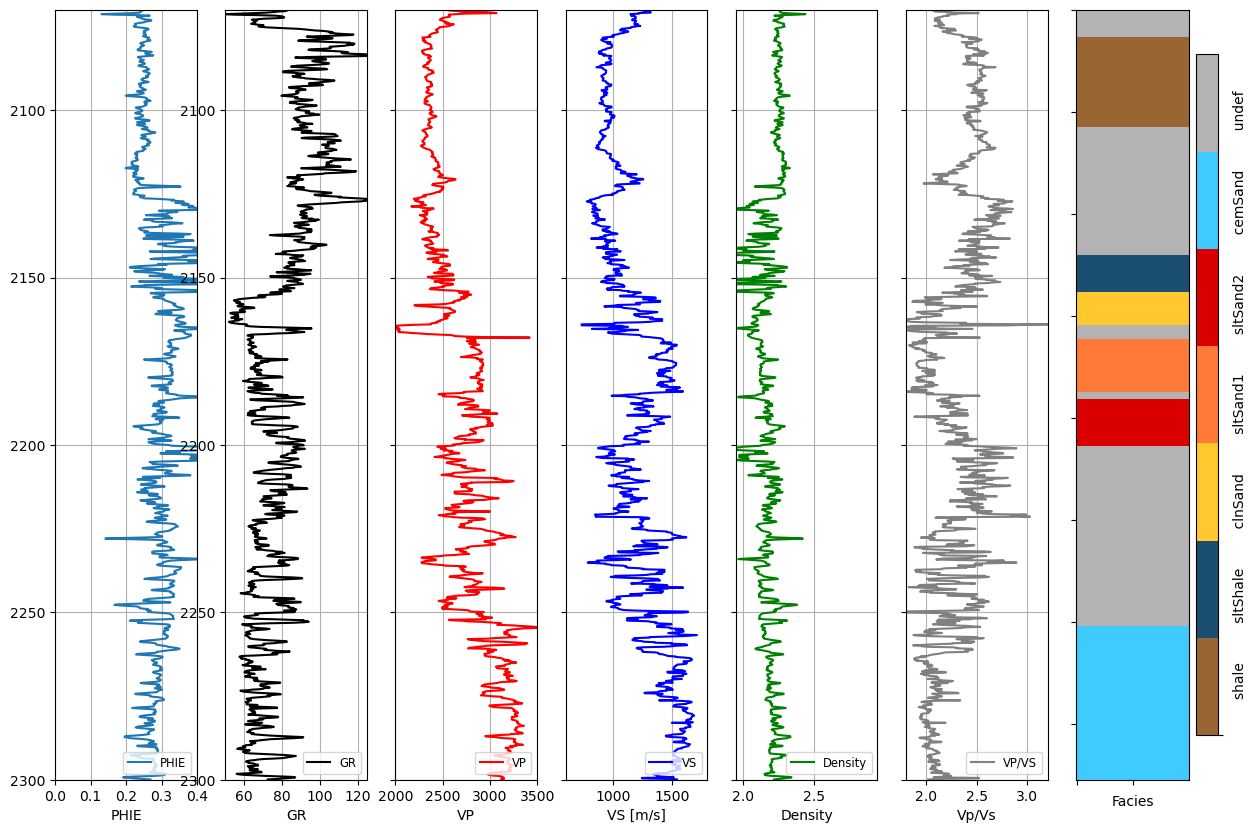

In [5]:
import matplotlib.colors as colors
ccc = ['#996633', '#1B4F72', '#FFC82E','#FF7A36', '#DB0000', '#40CBFF', '#B3B3B3']
cmap_facies = colors.ListedColormap(ccc[0:len(ccc)], 'indexed')

ztop=2070; zbot=2300  #ztop=2140; zbot=2200
ll=well2[(well2.DEPTH>=ztop) & (well2.DEPTH<=zbot)]

cluster=np.repeat(np.expand_dims(ll['FCODES'].values,1), 100, 1)

f, ax = plt.subplots(nrows=1, ncols=7, figsize=(15, 10))

ax[0].plot(ll.PHIE,    ll.DEPTH, label='PHIE')
ax[1].plot(ll.GR,      ll.DEPTH, '-k', label='GR')
ax[2].plot(ll.VP*1000, ll.DEPTH, '-r', label='VP')
ax[3].plot(ll.VS*1000, ll.DEPTH, 'blue', label='VS')
ax[4].plot(ll.RHOB,    ll.DEPTH, '-g', label='Density')
ax[5].plot(ll.VPVS,    ll.DEPTH, '-', color='0.5', label='VP/VS')
im=ax[6].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies,vmin=0,vmax=len(ax)-1)#4)

cbar=plt.colorbar(im, ax=ax[6], aspect=32)
cbar.set_label((9*' ').join(['shale', 'sltShale', 'clnSand', 'sltSand1', 'sltSand2', 'cemSand', 'undef']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

for i in range(len(ax)-1):
    ax[i].set_ylim(ztop,zbot)
    ax[i].invert_yaxis()
    ax[i].grid()
    ax[i].locator_params(axis='x', nbins=4)
    ax[i].legend(fontsize='small', loc='lower right')

ax[0].set_xlabel("PHIE"),          ax[0].set_xlim(0,0.4)
ax[1].set_xlabel("GR"),            ax[1].set_xlim(50, 125),     #ax[1].set_yticklabels([])
ax[2].set_xlabel("VP"),            ax[2].set_xlim(2000, 3500), ax[2].set_yticklabels([])
ax[4].set_xlabel("Density"),       ax[4].set_xlim(1.95, 2.95), ax[4].set_yticklabels([])
ax[3].set_xlabel("VS [m/s]"),      ax[3].set_xlim(600, 1800), ax[3].set_yticklabels([])
ax[5].set_xlabel("Vp/Vs"),         ax[5].set_xlim(1.8,3.2),    ax[5].set_yticklabels([])
ax[6].set_xlabel('Facies'),        ax[6].set_yticklabels([]),  ax[6].set_xticklabels([]);

# for i in range(len(ax)-1):
#     for top in tops.values() :
#         f.axes[i].axhline( y = float(top), color = 'b', lw = 2, 
#                             ls = ':',  
#                             alpha = 0.5, xmin = 0.05, xmax = 0.95 )
# for top, depth in tops.items():
#     if (ztop < depth < zbot):
#         ax[0].text( x = max(ax[0].xaxis.get_data_interval())*1.0,
#                   y = float(depth), s = top,
#                              alpha=0.75, color='k',
#                              fontsize = '10',
#                              horizontalalignment = 'left',
#                              verticalalignment = 'center',
#                              bbox=dict(facecolor='white', alpha=1.0, lw = 0.25),
#                              weight = 'light')



#plt.savefig("./images/logs_basic.png")

### Monte-Carlo resample from non-parametric distributions

The function `kde_resample()` creates three-dimensional (3D) kernel density estimates (kde's) for each lithofacies/fluid scenario distribution.  Creating a 3D kde ensures that each time the distribution is sampled from, the correlation between the P-wave, S-wave and density is maintained. 

Once the kde has been calculated, the resampling method is called for a specified number of times (here 500).  The output of the function is then input to the `r0g()` function below.

In [6]:
# Function parameters
column = 'LABELS'
lith_list = ['shale', 'sltShale', 'clnSand', 'sltSand1', 'sltSand2', 'cemSand']
logs = ['VP', 'VS', 'RHOB']
num_samples = 500

kde = kde_resample(well2, column, lith_list, logs, num_samples=1000)

### Function to calculate R0-G from re-sampled distributions

The function `r0g()` samples Vp, Vs & rho from the simulated cap-rock kde, `shale`, and then the simulated reservoir (`sltShale`, `clnSand`, `sltSand1`, `sltSand2` and `cemSand`) kde.  The correlated parameters from each lithology are then input to the equation (see References) to obtain a reflection coefficient (R0) and gradient (G) which is then used to determine the reflection coefficient for a particular angle theta for theta between 0-40 degrees.

The median of all sampled data for each value of theta is calculated.

### Calculate R0-G from each possible pair of lithologies

In [7]:
# kde[0]=='shale', kde[1]=='sltShale', kde[2]=='clnSand', kde[3]. kde[4], kde[5]
# kde[.][0]=='VP', kde[.][1]=='VS', kde[.][2]=='RHOB'
# Assumes that cap rock is in position 0

#                                r0g(vp0      , vs0      , rho0     , vp1      , vs1      , rho1)
r01_b, G1_b, Rtheta1_b, med1_b = r0g(kde[0][0], kde[0][1], kde[0][2], kde[1][0], kde[1][1], kde[1][2])
r02_b, G2_b, Rtheta2_b, med2_b = r0g(kde[0][0], kde[0][1], kde[0][2], kde[2][0], kde[2][1], kde[2][2])
r03_b, G3_b, Rtheta3_b, med3_b = r0g(kde[0][0], kde[0][1], kde[0][2], kde[3][0], kde[3][1], kde[3][2])
r04_b, G4_b, Rtheta4_b, med4_b = r0g(kde[0][0], kde[0][1], kde[0][2], kde[4][0], kde[4][1], kde[4][2])
r05_b, G5_b, Rtheta5_b, med5_b = r0g(kde[0][0], kde[0][1], kde[0][2], kde[5][0], kde[5][1], kde[5][2])

### Plot R0-G and Amplitude versus angle for each pair

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


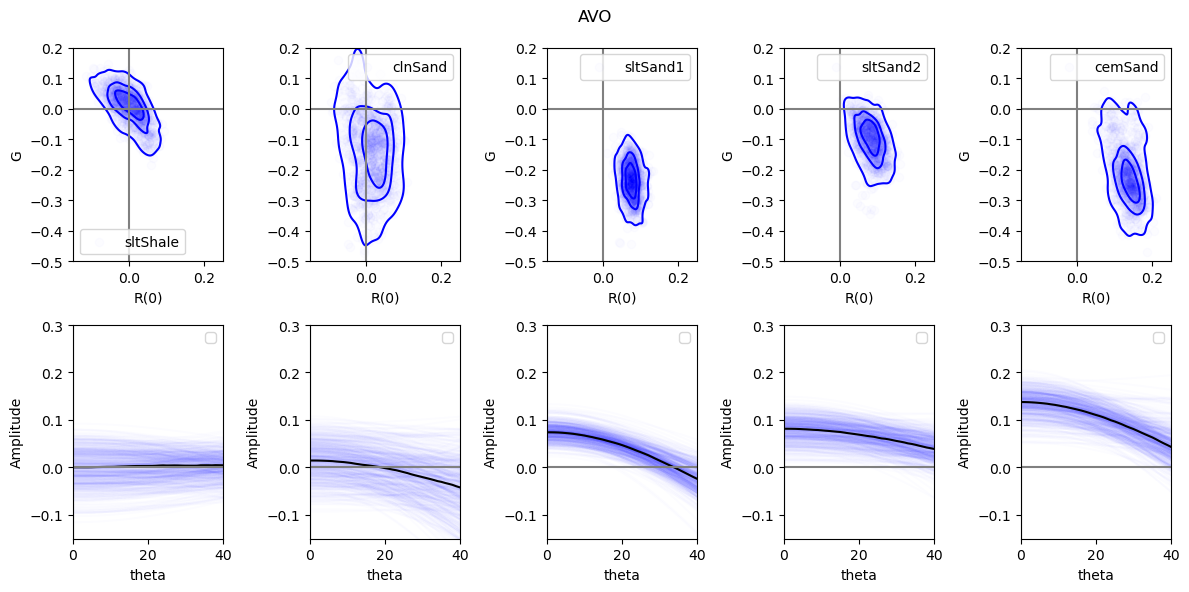

In [8]:
alpha1=0.01
alpha2=0.01

fig, ((ax1, ax2, ax3, ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2, 5, figsize=(12,6))
fig.suptitle('AVO')

ax1.scatter(r01_b, G1_b, label="sltShale", alpha=alpha1, color='blue')
sns.kdeplot(ax=ax1, x=r01_b, y=G1_b, color='blue', linestyles="-", levels=4)
ax1.set_xlabel("R(0)"); ax1.set_ylabel("G")

ax2.scatter(r02_b, G2_b, label="clnSand", alpha=alpha1, color='blue')
sns.kdeplot(ax=ax2, x=r02_b, y=G2_b, color="blue", linestyles="-", levels=4)
ax2.set_xlabel("R(0)"); ax3.set_ylabel("G")

ax3.scatter(r03_b, G3_b, label="sltSand1", alpha=alpha1, color='blue')
sns.kdeplot(ax=ax3, x=r03_b, y=G3_b, color="blue", linestyles="-", levels=4)
ax3.set_xlabel("R(0)"); ax3.set_ylabel("G")

ax4.scatter(r04_b, G4_b, label="sltSand2", alpha=alpha1, color='blue')
sns.kdeplot(ax=ax4, x=r04_b, y=G4_b, color="blue", linestyles="-", levels=4)
ax4.set_xlabel("R(0)"); ax4.set_ylabel("G")

ax5.scatter(r05_b, G5_b, label="cemSand", alpha=alpha1, color='blue')
sns.kdeplot(ax=ax5, x=r05_b, y=G5_b, color="blue", linestyles="-", levels=4)
ax5.set_xlabel("R(0)"); ax5.set_ylabel("G")

for i in range(num_samples):
    ax6.plot(Rtheta1_b[i][0], alpha=alpha2, color='blue')
ax6.plot(med1_b, 'k')
ax6.set_xlabel("theta"); ax6.set_ylabel("Amplitude")

for i in range(num_samples):
    ax7.plot(Rtheta2_b[i][0], alpha=alpha2, color='blue')
ax7.plot(med2_b, 'k')
ax7.set_xlabel("theta"); ax7.set_ylabel("Amplitude")

for i in range(num_samples):
    ax8.plot(Rtheta3_b[i][0], alpha=alpha2, color='blue')
ax8.plot(med3_b, 'k')
ax8.set_xlabel("theta"); ax8.set_ylabel("Amplitude")

for i in range(num_samples):
    ax9.plot(Rtheta4_b[i][0], alpha=alpha2, color='blue')
ax9.plot(med4_b, 'k')
ax9.set_xlabel("theta"); ax9.set_ylabel("Amplitude")

for i in range(num_samples):
    ax10.plot(Rtheta5_b[i][0], alpha=alpha2, color='blue')
ax10.plot(med5_b, 'k')
ax10.set_xlabel("theta"); ax10.set_ylabel("Amplitude")



ax1.set_xlim(-0.15, 0.25); ax1.set_ylim(-0.5, 0.2);
ax2.set_xlim(-0.15, 0.25); ax2.set_ylim(-0.5, 0.2); 
ax3.set_xlim(-0.15, 0.25); ax3.set_ylim(-0.5, 0.2);
ax4.set_xlim(-0.15, 0.25); ax4.set_ylim(-0.5, 0.2);
ax5.set_xlim(-0.15, 0.25); ax5.set_ylim(-0.5, 0.2);

ax6.set_xlim(0,40); ax6.set_ylim(-0.15, 0.3);
ax7.set_xlim(0,40); ax7.set_ylim(-0.15, 0.3);
ax8.set_xlim(0,40); ax8.set_ylim(-0.15, 0.3);
ax9.set_xlim(0,40); ax9.set_ylim(-0.15, 0.3);
ax10.set_xlim(0,40); ax10.set_ylim(-0.15, 0.3);


for ax in fig.get_axes():
    ax.legend()
    #ax.label_outer()
    ax.axvline(0, color='gray')
    ax.axhline(0, color='gray')
    
plt.tight_layout()

#plt.savefig("./images/R0_G_AVO_modeling.png")

**Top row**: Bivariate distribution of the different seismic lithofacies in the R(0)-G plane, assuming silty shale is the cap rock.  The centre of each contour plot represents the most likely set of R(0) and G for each facies. The contours represent iso-probability values, decreasing away from the innermost contour.

**Bottom row**: AVO pdfs for each lithofacies pair. The cap-rock is represented by a silty shale.  The superimposed black lines are the deterministic AVO responses calculated from the median values of the pdfs.  The equation $R(\theta) \approx R(0) + G\sin^2\theta$ is used to calculate these pdfs.

## References

### Equations
$R(\theta_1)\approx \dfrac{1}{2}\big(1-4p^2V_S^2\big)\dfrac{\Delta \rho}{\rho}+\dfrac{1}{2\cos^2\theta}\dfrac{\Delta V_P}{V_P}-4p^2V_S^2\dfrac{\Delta V_S}{V_S}$